In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Importing files needed
file1 = "../Resources/Mouse_metadata.csv"
mouse = pd.read_csv(file1)
# Add second file
file2 = "../Resources/Study_results.csv"
result = pd.read_csv(file2)

In [3]:
# Funtion finds the IQR for a given list and median of the list.
# This will be used later in the code for IQR values
def IQR(x,y,z):

#Creates a list to hold all the values needed
    lower = []
    upper = []
    outliers = []

#Examines the given dataframe and splits it in half based on the median
    for vol in x:
        if vol > y:
            upper.append(vol)
        elif vol < y:
            lower.append(vol)
            
# Places the values into a series
    low = pd.Series(lower)
    up = pd.Series(upper)
    
#Uses the pandas median function to determine the lower and upper quartiles
    lowmed = low.median()
    highmed = up.median()

#Finds the interquartile range and outlier determining values
    IQR = highmed - lowmed
    low_out = lowmed - (IQR * 1.5)
    high_out = highmed + (IQR *1.5)
            
#Creates a dataframe that contains the found values        
    quart = pd.DataFrame({"Upper Quartile": [highmed],
                          "Median": [y],
                         "Lower Quartile": [lowmed]})
    
#Returns the found values.    
    return print(f'{z} 3 Ranges:'),print(quart.to_string(index= False)),print(f"For {z}, values below {round(low_out,3)} and above {round(high_out,3)} are possible outliers. \n")

In [4]:
# Create a dataframe for the study results
result_df = pd.DataFrame(result)
result_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Cleaning the dataframe removing only the duplicates
result_clean_df = pd.DataFrame(result_df.drop_duplicates(subset = ['Mouse ID','Timepoint']))
result_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Creating a new dataframe
mouse_df = pd.DataFrame(mouse)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
# Rename column for readability
mouse_df = mouse_df.rename(columns = {"Age_months":"Age (Months)"})

# Checking for any null values
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age (Months)  249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [8]:
# Checking for any odd values
check_mouse_df = mouse_df.sort_values(["Mouse ID"], ascending = False)
check_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g)
248,z969,Naftisol,Male,9,30
247,z795,Naftisol,Female,13,29
246,z581,Infubinol,Female,24,25
8,z578,Ramicane,Male,11,16
245,z435,Propriva,Female,12,26


In [9]:
# Identifying any duplicates
mouse_df["Mouse ID"].value_counts()

c766    1
z234    1
o848    1
l872    1
k894    1
       ..
i477    1
w914    1
g316    1
w151    1
w193    1
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
# Combining the two data frames together
combined_table_df = pd.merge(mouse_df, result_clean_df, on = "Mouse ID")
combined_table_df.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Summary table by drug regimen

# Group the dataframe by the drug regimen
drugs = combined_table_df.groupby("Drug Regimen")

#Creating a summary table with the aggregate function
drug_summ = drugs["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
drug_summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


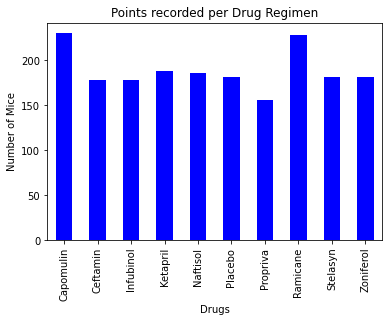

In [12]:
# Create a bar plot

# Creating the axis
x_axis = np.arange(0,len(drug_summ))

# The amount of subjects for each drug regiment
drug_count = drugs["Drug Regimen"].size()

# bar plot with pandas
drug_plot = drug_count.plot(kind = 'bar', color = 'blue')

drug_plot.set_xlabel("Drugs")
drug_plot.set_ylabel("Number of Mice")
plt.title("Points recorded per Drug Regimen")

# Saves an image of the plot
plt.savefig("plots/pandasbar.png")
plt.show()

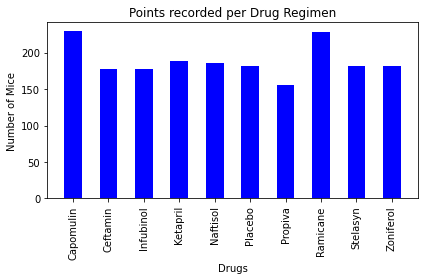

In [13]:
# bar plot using matplotlib

plt.bar(x_axis, drug_count, width =.5, color = 'blue', alpha = 1 ,align = 'center')

# Setting the tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo',
                           'Propiva','Ramicane','Stelasyn','Zoniferol'],
          rotation = 'vertical')
# Labels for the axis
plt.xlabel("Drugs")
plt.ylabel("Number of Mice")
plt.title("Points recorded per Drug Regimen")

# Shows the plot and saves it
plt.tight_layout()
plt.savefig("plots/matplotlibbar.png")

plt.show()

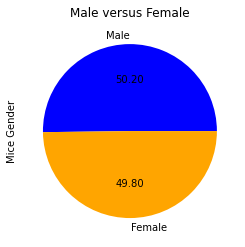

In [14]:
# Creating a pie chart based on the sex of the mice
# This uses pandas plot
sex_count = mouse_df['Sex'].value_counts()
sex_plot = sex_count.plot(kind = 'pie', y = 'Sex', title = 'Male versus Female', autopct = '%.2f',colors = ['blue','orange'])
sex_plot.set_ylabel("Mice Gender")

plt.savefig("plots/pandaspie.png")
plt.show()

In [ ]:
# This uses matplotlib to show the plot
label = ['Male', 'Female']
sizes = sex_count
colors = ['blue','orange']

plt.pie(sizes, labels=label, colors=colors, autopct = '%.2f')

plt.title("Male Versus Female")
plt.ylabel("Mice Gender")

plt.savefig("plots/matplotlibpie.png")
plt.show()

In [ ]:
# Cleans up the table to only have the latest timepoint
combined_table_clean_df = pd.DataFrame(combined_table_df.drop_duplicates(subset = ['Mouse ID'], keep = 'last'))

# Choosing only the 4 drug regimen values
# Capomulin, Ramicane, Infubinol, Ceftamin
reduced_drug_df = combined_table_clean_df.loc[(combined_table_clean_df["Drug Regimen"] == 'Capomulin') |
                                              (combined_table_clean_df["Drug Regimen"] == 'Ramicane') |
                                              (combined_table_clean_df["Drug Regimen"] == 'Infubinol') |
                                              (combined_table_clean_df["Drug Regimen"] == 'Ceftamin')]
reduced_drug_df.head()

In [ ]:
# Finds the median value for each drug
ramicane_df = reduced_drug_df.loc[(reduced_drug_df["Drug Regimen"] == 'Ramicane')]
ram_med = ramicane_df["Tumor Volume (mm3)"].median()

capomulin_df = reduced_drug_df.loc[(reduced_drug_df["Drug Regimen"] == 'Capomulin')]
cap_med = capomulin_df["Tumor Volume (mm3)"].median()

infubinol_df = reduced_drug_df.loc[(reduced_drug_df["Drug Regimen"] == 'Infubinol')]
inf_med = infubinol_df["Tumor Volume (mm3)"].median()

ceftamin_df = reduced_drug_df.loc[(reduced_drug_df["Drug Regimen"] == 'Ceftamin')]
cef_med = ceftamin_df["Tumor Volume (mm3)"].median()

# Finding the quartile ranges using the function above
Ramicane_bounds = IQR(ramicane_df["Tumor Volume (mm3)"],ram_med,"Ramicane")
Capomulin_bounds = IQR(capomulin_df["Tumor Volume (mm3)"],cap_med,"Capomulin")
Infubinol_bounds = IQR(infubinol_df["Tumor Volume (mm3)"],inf_med,"Infubinol")
Ceftamin_bounds = IQR(ceftamin_df["Tumor Volume (mm3)"],cef_med,"Ceftamin")

# Will print out a table of values showing
# Upper quartile, lower quartile, median,
# and determines what values would be considered outliers.

In [ ]:
#Creating the box plot for the the drug regimens
# Creates a list with the drug names
drug_name = []

# Loops through the drug regimen column and finds unique names
for drug in reduced_drug_df["Drug Regimen"]:
    if drug not in drug_name:
        drug_name.append(drug)
        
#Sets the values for the plot
ramicane = ramicane_df["Tumor Volume (mm3)"]
capomulin = capomulin_df["Tumor Volume (mm3)"]
infubinol = infubinol_df["Tumor Volume (mm3)"]
ceftamin = ceftamin_df["Tumor Volume (mm3)"]

drugs = [ramicane,capomulin,infubinol,ceftamin]

# Creates my box plot
fig, (ax1) = plt.subplots()
ax1.boxplot(drugs,sym = 'ro')

# Modifies the plot for easier comprehension
fig.suptitle('Comparison of Drugs')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
tick_locations = [value for value in range(4)]
plt.xticks([1,2,3,4], drug_name ,rotation = 'vertical')

plt.grid()
plt.savefig("plots/boxwhiskers.png")


plt.show()

In [ ]:
# Insight into the dataframe
# This is needed to understand the outlier present for the Infubinol drug regimen
infubinol_df.sort_values(["Tumor Volume (mm3)"],ascending = True).head()

In [ ]:
# Searching through the dataframe for mice using Capomulin
mouse_cap = combined_table_df.loc[(combined_table_df['Drug Regimen'] == 'Capomulin')]

# We would like to select one mouse(preferably with multiple timepoints)
mouse_cap

In [ ]:
# In this case, mouse s185 will be used for the line graph.
mouse = 's185'

# Setting up the table to only include the selected mouse
m_s185 = combined_table_df.loc[(combined_table_df['Mouse ID'] == mouse)]

# Setting our x-values and y-values respectively
timepoint = m_s185['Timepoint']
tumor = m_s185['Tumor Volume (mm3)']

# Creating the line chart
mouse_s185 = plt.plot(timepoint,tumor,color = 'blue', Label = 'Mouse S185')

# Modifying the chart to make it easier to comprehend
plt.title('Tumor Volume over Time (Capumulin)')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim = (0,45)
plt.ylim = (tumor.min() - 1, tumor.max() + 1)

# Inputting a legend to identify what points were used.
plt.legend(handles= mouse_s185, loc="best")
plt.grid()
plt.savefig("plots/linechart.png")

plt.show()

In [ ]:
# Creating a scatterplot for the weight and tumor volume

mouse_weight = mouse_cap['Weight (g)']
mouse_tumor = mouse_cap['Tumor Volume (mm3)']

plt.scatter(mouse_tumor,mouse_weight,marker='o')

# Modifying the graph to look more comprehendible
plt.title('Weight vs Tumor Volume')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.savefig("plots/scatterplot.png")

plt.show()

In [ ]:
# Creating a regression line that goes with the scatter plot above.
x_values = mouse_tumor
y_values = mouse_weight

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(37,18),fontsize=14,color="red")

# Adds a title and adds labels
plt.title("Weight Versus Tumor Volume")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')

# Prints out the coefficients of the regression line.
print(f'The correlation coefficient between the weight and the tumor is {round(rvalue,2)}')
plt.savefig("plots/linregress.png")

plt.show()